In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, read_file, GeoDataFrame



In [2]:
zipfile = "lsm.zip"
df= gpd.read_file(zipfile)


NameError: name 'gpd' is not defined

In [4]:
zipfile = "Bireuen.geojson"
file = open (zipfile)
df = gpd.read_file(file)


In [8]:
df.read()

AttributeError: 'GeoDataFrame' object has no attribute 'read'

In [5]:
df.plot()

NameError: name 'kota' is not defined

<Axes: >

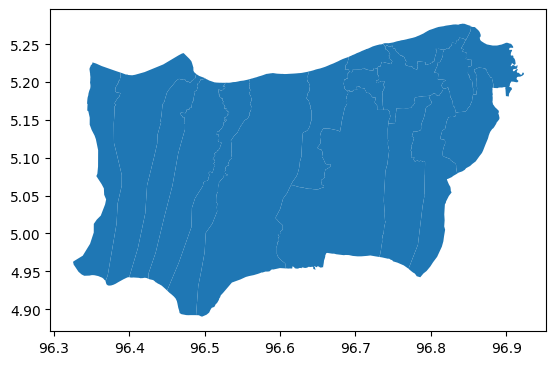

In [6]:
df.plot()

<Axes: >

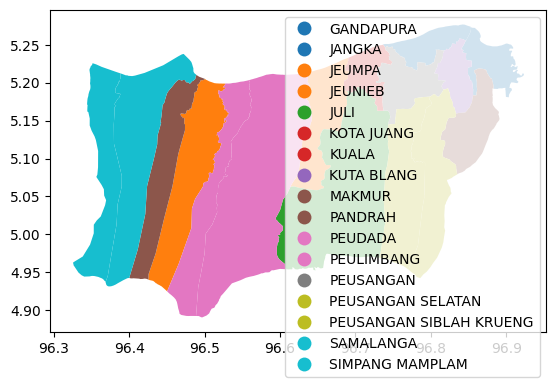

In [10]:
df.plot(column='Name', legend=True)

In [11]:
pip install mapclassify

In [12]:
import mapclassify
df.explore()

In [15]:
df.explore(
    column="Name",  # make choropleth based on "BoroName" column
    tooltip="Name",  # show "BoroName" value in tooltip (on hover)
    popup=True,   # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)

In [17]:
import folium
m = df.explore(
    column="Name",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["Name", "Name"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="Name",  # name of the layer in the map
)
df.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="Name",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="Name",  # name of the layer in the map
)
folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control
m  # show map

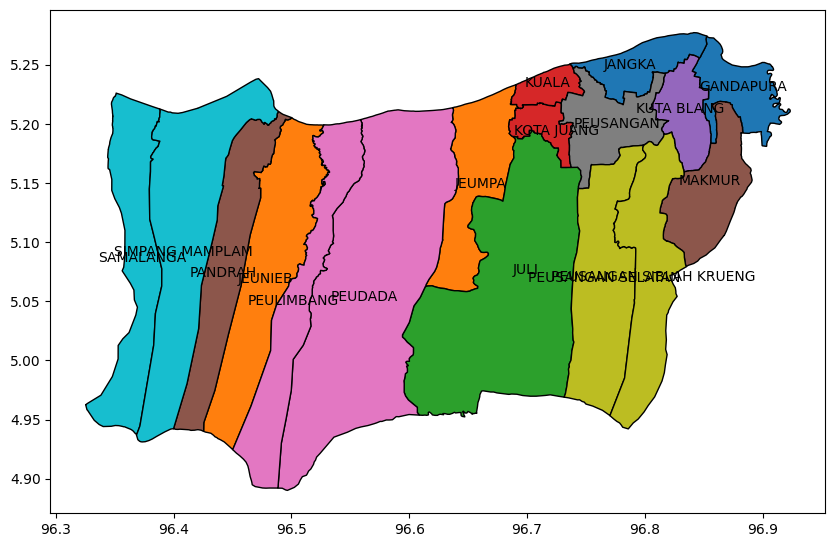

In [19]:
df["coords"] = df["geometry"].apply(lambda x: x.representative_point().coords[:])
df["coords"] = [coords[0] for coords in df["coords"]]
fig, ax = plt.subplots(figsize = (10,10))
df.plot(ax=ax,   column="Name", categorical=True,edgecolor="black", )
for idx, row in df.iterrows():
   plt.annotate(text=row["Name"], xy=row["coords"], horizontalalignment="center", color="black")